<a href="https://colab.research.google.com/github/ishitasharma4403/Ads-CTR-Prediction/blob/main/CTR_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')

In [147]:
df = pd.read_csv('Ad_click_prediction_train (1).csv')

In [148]:
df.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0


In [149]:
df.shape

(463291, 15)

In [150]:
tab_info = pd.DataFrame(df.dtypes).T.rename(index={0: 'column type'})
tab_info = pd.concat([tab_info, pd.DataFrame(df.isnull().sum()).T.rename(index={0: 'null values (nb)'})], axis=0)
tab_info = pd.concat([tab_info, pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename(index={0: 'null values (%)'})], axis=0)
tab_info

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
column type,int64,object,int64,object,int64,int64,int64,float64,float64,object,float64,float64,float64,int64,int64
null values (nb),0,0,0,0,0,0,0,365854,18243,18243,18243,18243,125129,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.96851,3.937698,3.937698,3.937698,3.937698,27.008727,0.0,0.0


In [151]:
df.drop(labels='product_category_2', axis=1, inplace=True)

In [152]:
sum(df['is_click'] == 1)

31331

In [153]:
num_missing = df['city_development_index'].isnull().sum()
if num_missing > 0:
    missing_indices = df['city_development_index'].isnull()
    num_missing_values = num_missing
    replace_values = np.random.choice([1, 2, 3,4], size=num_missing_values, p=[0.25, 0.25,0.25,0.25])
    df['city_development_index'][missing_indices] = replace_values

In [154]:
df.isna().sum()

session_id                    0
DateTime                      0
user_id                       0
product                       0
campaign_id                   0
webpage_id                    0
product_category_1            0
user_group_id             18243
gender                    18243
age_level                 18243
user_depth                18243
city_development_index        0
var_1                         0
is_click                      0
dtype: int64

In [155]:
df = df.dropna()

In [156]:
df.isna().sum()

session_id                0
DateTime                  0
user_id                   0
product                   0
campaign_id               0
webpage_id                0
product_category_1        0
user_group_id             0
gender                    0
age_level                 0
user_depth                0
city_development_index    0
var_1                     0
is_click                  0
dtype: int64

In [157]:
sum(df['is_click'] == 1)

30057

In [158]:

df.head()


,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,8.0,Female,2.0,2.0,3.0,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,8.0,Female,2.0,2.0,4.0,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,2.0,Male,2.0,3.0,2.0,1,0


In [159]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df['gender'] = LE.fit_transform(df['gender'])
df['product'] = LE.fit_transform(df['product'])

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 445048 entries, 0 to 463290
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   session_id              445048 non-null  int64  
 1   DateTime                445048 non-null  object 
 2   user_id                 445048 non-null  int64  
 3   product                 445048 non-null  int64  
 4   campaign_id             445048 non-null  int64  
 5   webpage_id              445048 non-null  int64  
 6   product_category_1      445048 non-null  int64  
 7   user_group_id           445048 non-null  float64
 8   gender                  445048 non-null  int64  
 9   age_level               445048 non-null  float64
 10  user_depth              445048 non-null  float64
 11  city_development_index  445048 non-null  float64
 12  var_1                   445048 non-null  int64  
 13  is_click                445048 non-null  int64  
dtypes: float64(4), int64(9), 

In [161]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['DateTime'] = df['DateTime'].dt.hour

In [162]:
df.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,0,858557,2,359520,13787,4,10.0,0,4.0,3.0,3.0,0,0
1,333291,0,243253,2,105960,11085,5,8.0,0,2.0,2.0,3.0,0,0
2,129781,0,243253,2,359520,13787,4,8.0,0,2.0,2.0,4.0,0,0
3,464848,0,1097446,8,359520,13787,3,3.0,1,3.0,3.0,2.0,1,0
4,90569,0,663656,2,405490,60305,3,2.0,1,2.0,3.0,2.0,1,0


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 445048 entries, 0 to 463290
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   session_id              445048 non-null  int64  
 1   DateTime                445048 non-null  int32  
 2   user_id                 445048 non-null  int64  
 3   product                 445048 non-null  int64  
 4   campaign_id             445048 non-null  int64  
 5   webpage_id              445048 non-null  int64  
 6   product_category_1      445048 non-null  int64  
 7   user_group_id           445048 non-null  float64
 8   gender                  445048 non-null  int64  
 9   age_level               445048 non-null  float64
 10  user_depth              445048 non-null  float64
 11  city_development_index  445048 non-null  float64
 12  var_1                   445048 non-null  int64  
 13  is_click                445048 non-null  int64  
dtypes: float64(4), int32(1), 

In [164]:
df.nunique()

session_id                445048
DateTime                      24
user_id                   143837
product                       10
campaign_id                   10
webpage_id                     9
product_category_1             5
user_group_id                 13
gender                         2
age_level                      7
user_depth                     3
city_development_index         4
var_1                          2
is_click                       2
dtype: int64

In [165]:
print("not click：", df.loc[df['is_click']==0].shape[0])
print("clicked：", df.loc[df['is_click']==1].shape[0])

not click： 414991
clicked： 30057


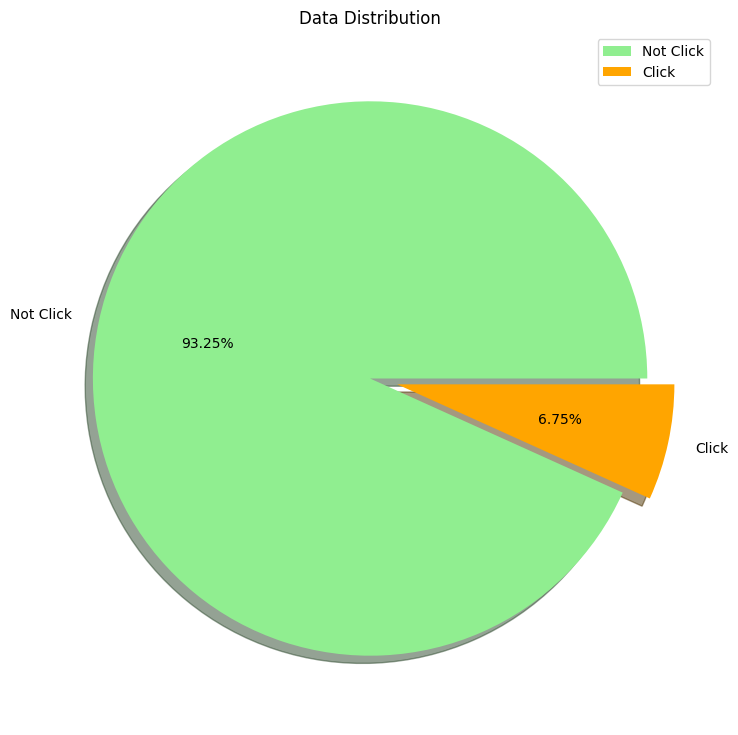

In [166]:
labels = ['Not Click', 'Click']
size = df['is_click'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]
plt.figure(figsize=(9,9))
plt.pie(size, colors=colors, explode=explode, labels=labels, shadow=True, autopct='%.2f%%')
plt.axis('off')
plt.title("Data Distribution")
plt.legend()
plt.show()

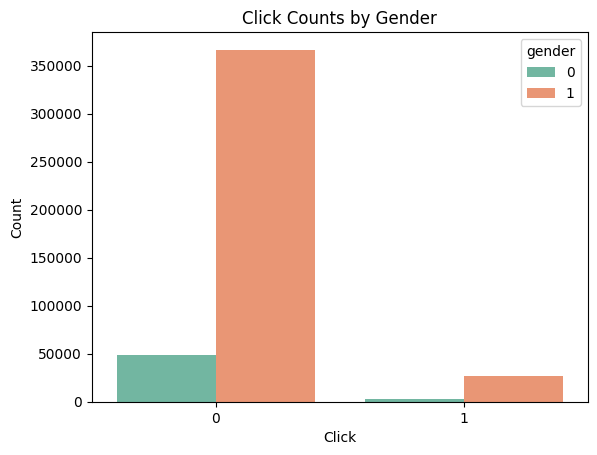

In [167]:
sns.countplot(x='is_click', hue='gender',
              data=df,
              palette='Set2')

# set the plot title and axis labels
plt.title('Click Counts by Gender')
plt.xlabel('Click')
plt.ylabel('Count')
plt.show()

In [168]:
Male = df[df['gender']==1]
Male
Female = df[df['gender']==0]
print(f"Male click rate:{round(100*sum(Male['is_click']==1)/Male.shape[0],2)}%")
print(f"Female click rate:{round(100*sum(Female['is_click']==1)/Female.shape[0],2)}%")

Male click rate:6.79%
Female click rate:6.44%


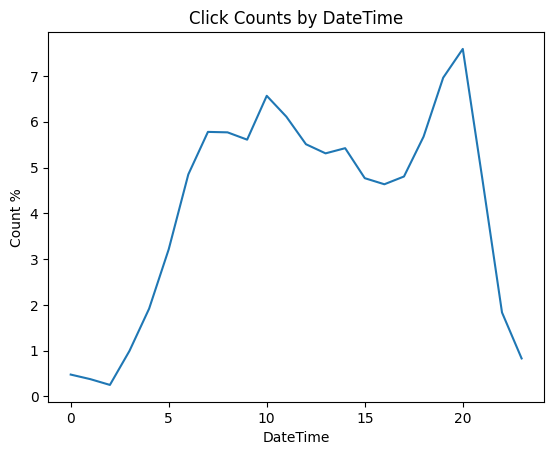

In [169]:
Is_clicked = df[df['is_click']==1]
Is_clicked_hour = Is_clicked.groupby('DateTime').agg('sum').reset_index()
Is_clicked_hour['is_click'] = 100*Is_clicked_hour['is_click']/sum(Is_clicked_hour['is_click'])
Is_clicked_hour

sns.lineplot(x='DateTime',
             y='is_click',
             data=Is_clicked_hour,
             palette='Set2')

plt.title('Click Counts by DateTime')
plt.xlabel('DateTime')
plt.ylabel('Count %')

plt.show()


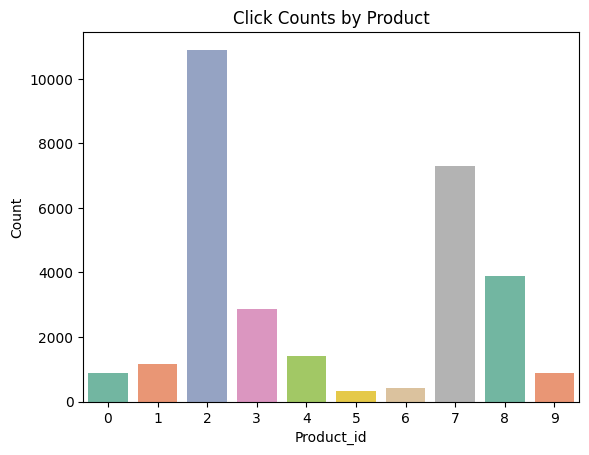

In [170]:
sns.countplot(x='product',data=df[df['is_click'] == 1], palette='Set2')

plt.title('Click Counts by Product')
plt.xlabel('Product_id')
plt.ylabel('Count')

plt.show()

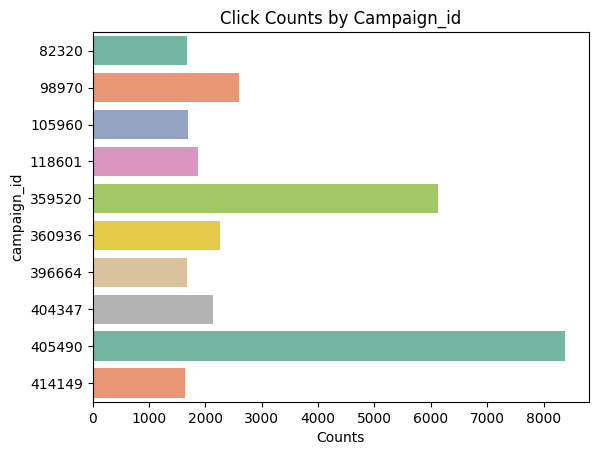

In [171]:
sns.countplot(y='campaign_id',data=df[df['is_click'] == 1], palette='Set2')

plt.title('Click Counts by Campaign_id')
plt.xlabel('Counts')
plt.ylabel('campaign_id')

plt.show()

In [172]:
from collections import Counter
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
df

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,0,858557,2,359520,13787,4,10.0,0,4.0,3.0,3.0,0,0
1,333291,0,243253,2,105960,11085,5,8.0,0,2.0,2.0,3.0,0,0
2,129781,0,243253,2,359520,13787,4,8.0,0,2.0,2.0,4.0,0,0
3,464848,0,1097446,8,359520,13787,3,3.0,1,3.0,3.0,2.0,1,0
4,90569,0,663656,2,405490,60305,3,2.0,1,2.0,3.0,2.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463286,583588,23,572718,7,118601,28529,5,4.0,1,4.0,3.0,2.0,0,0
463287,198389,23,130461,8,118601,28529,4,10.0,0,4.0,3.0,2.0,1,0
463288,563423,23,306241,3,118601,28529,4,2.0,1,2.0,3.0,3.0,0,0
463289,595571,23,306241,3,118601,28529,5,2.0,1,2.0,3.0,2.0,0,0


In [173]:
df_sampled = df.groupby('is_click').apply(lambda x: x.sample(n=7000 if x.name == 1 else 20000)).reset_index(drop=True)

In [174]:
df_sampled['is_click'].value_counts()
x_1 = df_sampled.drop(['is_click','session_id'],axis=1)
y_1 = df_sampled['is_click']
print('Clicked:',sum(y_1==1))
print('Not clicked:',sum(y_1==0))

Clicked: 7000
Not clicked: 20000


In [175]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_1= scaler.fit_transform(x_1)
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1, y_1, test_size=0.3, shuffle=True)

In [176]:
df_2 = df.sample(n=30000)
x_2 = df_2.drop(['is_click','session_id'],axis=1)
y_2 = df_2['is_click']
print('Clicked:',sum(y_2==1))
print('Not clicked:',sum(y_2==0))
x_2.shape

Clicked: 2044
Not clicked: 27956


(30000, 12)

In [177]:
x_2= scaler.fit_transform(x_2)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2, y_2, test_size=0.3, shuffle=True)

In [178]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
sm = SMOTE(random_state=2)
x_train_2, y_train_2 = sm.fit_resample(x_train_2, y_train_2)

In [179]:
pd.Series(y_train_2).value_counts()

is_click
0    19554
1    19554
Name: count, dtype: int64

In [180]:
pd.Series(y_test_2).value_counts()

is_click
0    8402
1     598
Name: count, dtype: int64

In [181]:
x_train_2.shape

(39108, 12)

In [182]:
x_test_2.shape

(9000, 12)

In [213]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from collections import Counter

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

classifiers = {

    'LogisticRegression':LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    'DT':DecisionTreeClassifier(),
    'RFC':RandomForestClassifier(),
    'Bagging':BaggingClassifier(),
    'SGD':SGDClassifier(),
    'GBC':GradientBoostingClassifier(),
    'xgb':XGBClassifier()
}

In [214]:
def accuracy_score(X_train, y_train):
    for key, classifier in classifiers.items():
        classifier.fit(X_train, y_train)
        training_score = cross_val_score(classifier, X_train, y_train, cv=5)
        print("Classifier Name : ", classifier.__class__.__name__,"  Training Score ：", round(training_score.mean(), 2)*100,'%')

In [215]:
accuracy_score(x_train_1, y_train_1)

Classifier Name :  LogisticRegression   Training Score ： 74.0 %
Classifier Name :  KNeighborsClassifier   Training Score ： 69.0 %
Classifier Name :  DecisionTreeClassifier   Training Score ： 62.0 %
Classifier Name :  RandomForestClassifier   Training Score ： 71.0 %
Classifier Name :  BaggingClassifier   Training Score ： 70.0 %
Classifier Name :  SGDClassifier   Training Score ： 74.0 %
Classifier Name :  GradientBoostingClassifier   Training Score ： 74.0 %
Classifier Name :  XGBClassifier   Training Score ： 72.0 %


In [216]:

accuracy_score(x_train_2, y_train_2)

Classifier Name :  LogisticRegression   Training Score ： 53.0 %
Classifier Name :  KNeighborsClassifier   Training Score ： 85.0 %
Classifier Name :  DecisionTreeClassifier   Training Score ： 91.0 %
Classifier Name :  RandomForestClassifier   Training Score ： 95.0 %
Classifier Name :  BaggingClassifier   Training Score ： 94.0 %
Classifier Name :  SGDClassifier   Training Score ： 53.0 %
Classifier Name :  GradientBoostingClassifier   Training Score ： 88.0 %
Classifier Name :  XGBClassifier   Training Score ： 94.0 %


In [217]:
def LR_gs(X_train, y_train):
    # LR
    LR_param = {
        'penalty':['l1', 'l2'],
        'C':[0.001, 0.01, 0.1, 1, 10]
    }

    LR_gs = GridSearchCV(LogisticRegression(),param_grid=LR_param, n_jobs=-1, scoring='accuracy')
    LR_gs.fit(X_train, y_train)

    LR_estimators = LR_gs.best_estimator_

    return LR_estimators
def KNN_gs(X_train, y_train):
    KNN_param = {
        'n_neighbors':list(range(2, 5, 1)),
        'algorithm':['auto','ball_tree','kd_tree','brute']
    }

    KNN_gs = GridSearchCV(KNeighborsClassifier(), param_grid=KNN_param, n_jobs=-1, scoring='accuracy')
    KNN_gs.fit(X_train, y_train)

    KNN_estimators = KNN_gs.best_estimator_

    return KNN_estimators


    return SVC_estimators
def DT_gs(X_train, y_train):
    DT_param = {
        'criterion':['gini', 'entropy'],
        'max_depth':list(range(2, 5, 1)),
        'min_samples_leaf':list(range(3, 7, 1))
    }
    DT_gs = GridSearchCV(DecisionTreeClassifier(), param_grid=DT_param, n_jobs=-1, scoring='accuracy')
    DT_gs.fit(X_train, y_train)

    DT_estimators = DT_gs.best_estimator_

    return DT_estimators
def RFC_gs(X_train, y_train):
    RFC_param = {
        'n_estimators':[100, 150, 200],
        'criterion':['gini', 'entropy'],
        'max_depth':list(range(2,5,1)),
    }

    RFC_gs = GridSearchCV(RandomForestClassifier(), param_grid=RFC_param, n_jobs=-1, scoring='accuracy')
    RFC_gs.fit(X_train, y_train)

    RFC_estimators = RFC_gs.best_estimator_

    return RFC_estimators
def BAG_gs(X_train, y_train):
    BAG_param = {
        'n_estimators':[10, 15, 20]
    }

    BAG_gs = GridSearchCV(BaggingClassifier(), param_grid=BAG_param, n_jobs=-1, scoring='accuracy')
    BAG_gs.fit(X_train, y_train)

    BAG_estimators = BAG_gs.best_estimator_

    return BAG_estimators


    return SGD_estimators
def XGB_gs(X_train, y_train):
    XGB_param = {
        'max_depth':[3,4,5,6]
    }

    XGB_gs = GridSearchCV(XGBClassifier(), param_grid=XGB_param, n_jobs=-1, scoring='accuracy')
    XGB_gs.fit(X_train, y_train)

    XGB_estimators = XGB_gs.best_estimator_

    return XGB_estimators

In [218]:
LR_best_estimator = LR_gs(x_train_1,y_train_1)
KNN_best_estimator = KNN_gs(x_train_1,y_train_1)
DT_best_estimator = DT_gs(x_train_1,y_train_1)
RFC_best_estimator = RFC_gs(x_train_1,y_train_1)
BAG_best_estimator = BAG_gs(x_train_1,y_train_1)
XGB_best_estimator = XGB_gs(x_train_1,y_train_1)

In [219]:
LR_best_estimator = LR_gs(x_train_2,y_train_2)
KNN_best_estimator = KNN_gs(x_train_2,y_train_2)
DT_best_estimator = DT_gs(x_train_2,y_train_2)
RFC_best_estimator = RFC_gs(x_train_2,y_train_2)
BAG_best_estimator = BAG_gs(x_train_2,y_train_2)
XGB_best_estimator = XGB_gs(x_train_2,y_train_2)

In [220]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.metrics import roc_auc_score # Make sure to import roc_auc_score
result_df1 = pd.DataFrame(columns=['Accuracy', 'F1-score', 'Recall', 'Precision', 'AUC_ROC'],
                         index=['LR','KNN','DT','RFC','Bagging','XGB'])
def caculate(models, X_test, y_test):

    accuracy_results = []
    F1_score_results = []
    Recall_results = []
    Precision_results = []
    AUC_ROC_results = []

    for model in models:
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)
        AUC_ROC = roc_auc_score(y_test, y_pred) # AUC

        accuracy_results.append(accuracy)
        F1_score_results.append(f1_score)
        Recall_results.append(recall)
        AUC_ROC_results.append(AUC_ROC)
        Precision_results.append(precision)
    return accuracy_results, F1_score_results, Recall_results, AUC_ROC_results, Precision_results
best_models = [LR_best_estimator, KNN_best_estimator, DT_best_estimator, RFC_best_estimator,
               BAG_best_estimator, XGB_best_estimator]
accuracy_results, F1_score_results, Recall_results, AUC_ROC_results, Precision_results =caculate(best_models,x_test_1,y_test_1)
result_df1['Accuracy'] = accuracy_results
result_df1['F1-score'] = F1_score_results
result_df1['Recall'] = Recall_results
result_df1['Precision'] = Precision_results
result_df1['AUC_ROC'] = AUC_ROC_results
result_df1

,Accuracy,F1-score,Recall,Precision,AUC_ROC
LR,0.548765,"[0.6522028737272814, 0.35775786329291864]","[0.5735564853556485, 0.47905882352941176]","[0.7558447287163652, 0.2854739203589456]",0.526308
KNN,0.702840,"[0.8171667299658185, 0.20691927512355848]","[0.9002510460251046, 0.14776470588235294]","[0.7481223922114048, 0.34505494505494505]",0.524008
DT,0.452346,"[0.5009000900090009, 0.3933260393873086]","[0.37255230125523014, 0.6767058823529412]","[0.7641606591143152, 0.27723154038943515]",0.524629
RFC,0.338642,"[0.248140350877193, 0.4096969696969697]","[0.14794979079497908, 0.8748235294117647]","[0.768695652173913, 0.26748201438848923]",0.511387
Bagging,0.338642,"[0.24940451169959366, 0.40891537018647245]","[0.1489539748953975, 0.872]","[0.76592082616179, 0.26707985010089363]",0.510477
XGB,0.303210,"[0.1359461114513166, 0.4162184526272238]","[0.07430962343096234, 0.9468235294117647]","[0.7971274685816876, 0.26673737239825]",0.510567


<Axes: xlabel='None', ylabel='AUC_ROC'>

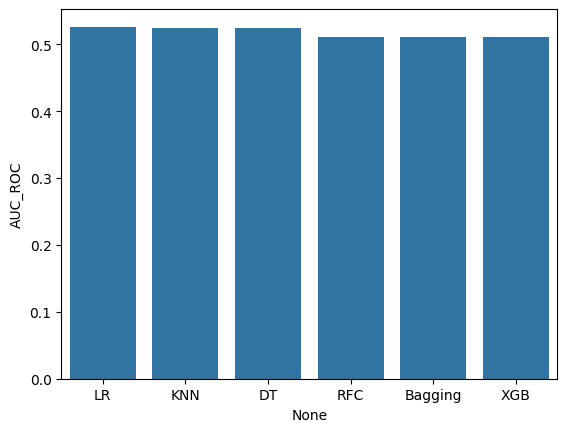

In [221]:
sns.barplot(data=result_df1,x=result_df1.index,y='AUC_ROC')

In [222]:
best_models = [LR_best_estimator, KNN_best_estimator,  DT_best_estimator, RFC_best_estimator,
               BAG_best_estimator, XGB_best_estimator]
result_df2 = pd.DataFrame(columns=['Accuracy', 'F1-score', 'Recall', 'Precision', 'AUC_ROC'],
                         index=['LR','KNN','DT','RFC','Bagging','XGB'])
accuracy_results, F1_score_results, Recall_results, AUC_ROC_results, Precision_results = caculate(best_models,x_test_2,y_test_2)
result_df2['Accuracy'] = accuracy_results
result_df2['F1-score'] = F1_score_results
result_df2['Recall'] = Recall_results
result_df2['Precision'] = Precision_results
result_df2['AUC_ROC'] = AUC_ROC_results
result_df2

,Accuracy,F1-score,Recall,Precision,AUC_ROC
LR,0.561889,"[0.7068619433499367, 0.13321609144867003]","[0.5658176624613187, 0.5066889632107023]","[0.9415725886314121, 0.07668944570994685]",0.536253
KNN,0.843778,"[0.9145496535796767, 0.09055627425614488]","[0.8955010711735301, 0.11705685618729098]","[0.9344262295081968, 0.07383966244725738]",0.506279
DT,0.655444,"[0.7852641783809985, 0.12868783366114078]","[0.6748393239704832, 0.38294314381270905]","[0.9388971684053651, 0.077338736913205]",0.528891
RFC,0.648778,"[0.7801960920659202, 0.12655429676706273]","[0.6676981671030707, 0.38294314381270905]","[0.9382839939789263, 0.07580271433300231]",0.525321
Bagging,0.906667,"[0.9509460406447092, 0.04109589041095891]","[0.9690549869078791, 0.030100334448160536]","[0.933501490483834, 0.06474820143884892]",0.499578
XGB,0.928222,"[0.9627536900369005, 0.01524390243902439]","[0.9936919781004523, 0.008361204013377926]","[0.9336837396555581, 0.08620689655172414]",0.501027


<Axes: xlabel='None', ylabel='AUC_ROC'>

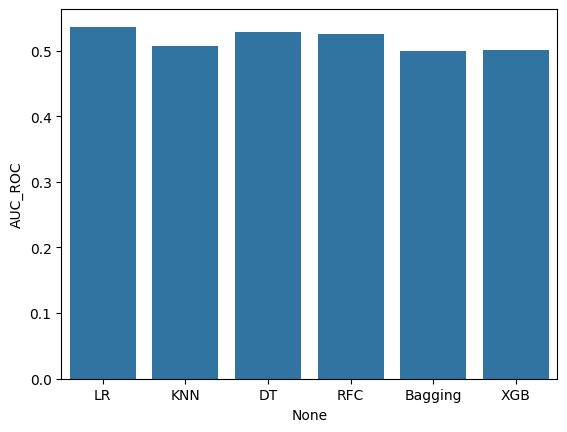

In [223]:
sns.barplot(data=result_df2,x=result_df2.index,y='AUC_ROC')

In [224]:
top_3_classifier_1 = result_df1.sort_values('AUC_ROC',ascending = False)[:3]
top_3_classifier_1

,Accuracy,F1-score,Recall,Precision,AUC_ROC
LR,0.548765,"[0.6522028737272814, 0.35775786329291864]","[0.5735564853556485, 0.47905882352941176]","[0.7558447287163652, 0.2854739203589456]",0.526308
DT,0.452346,"[0.5009000900090009, 0.3933260393873086]","[0.37255230125523014, 0.6767058823529412]","[0.7641606591143152, 0.27723154038943515]",0.524629
KNN,0.702840,"[0.8171667299658185, 0.20691927512355848]","[0.9002510460251046, 0.14776470588235294]","[0.7481223922114048, 0.34505494505494505]",0.524008


In [225]:
top_3_classifier_2 = result_df2.sort_values('AUC_ROC',ascending = False)[:3]
top_3_classifier_2

,Accuracy,F1-score,Recall,Precision,AUC_ROC
LR,0.561889,"[0.7068619433499367, 0.13321609144867003]","[0.5658176624613187, 0.5066889632107023]","[0.9415725886314121, 0.07668944570994685]",0.536253
DT,0.655444,"[0.7852641783809985, 0.12868783366114078]","[0.6748393239704832, 0.38294314381270905]","[0.9388971684053651, 0.077338736913205]",0.528891
RFC,0.648778,"[0.7801960920659202, 0.12655429676706273]","[0.6676981671030707, 0.38294314381270905]","[0.9382839939789263, 0.07580271433300231]",0.525321


In [226]:
from sklearn.ensemble import VotingClassifier

voting_clf1 = VotingClassifier(estimators=[('KNN', KNN_best_estimator), ('LR', LR_best_estimator),
                                          ('DT',DT_best_estimator )], n_jobs=-1)
voting_clf1.fit(x_train_1, y_train_1)

VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=2)),
                             ('LR', LogisticRegression(C=0.1)),
                             ('DT',
                              DecisionTreeClassifier(max_depth=4,
                                                     min_samples_leaf=3))],
                 n_jobs=-1)

In [227]:
voting_clf2 = VotingClassifier(estimators=[('DT', DT_best_estimator), ('XGB',XGB_best_estimator ),
                                          ('LR', LR_best_estimator)], n_jobs=-1)
voting_clf2.fit(x_train_2, y_train_2)

VotingClassifier(estimators=[('DT',
                              DecisionTreeClassifier(max_depth=4,
                                                     min_samples_leaf=3)),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=6,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('LR', LogisticRegression(C=0.1))],
                 n_jobs=-1)

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      5975
           1       0.00      0.00      0.00      2125

    accuracy                           0.74      8100
   macro avg       0.37      0.50      0.42      8100
weighted avg       0.54      0.74      0.63      8100



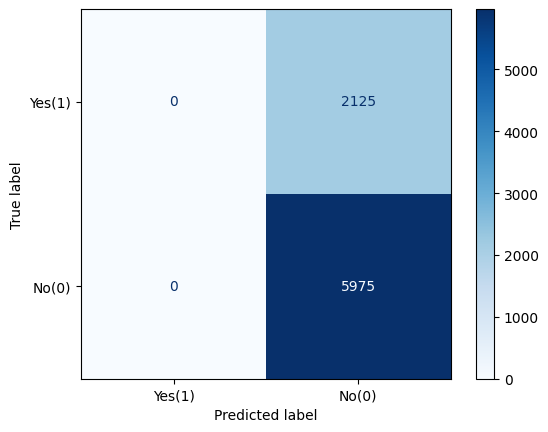

0.5


In [228]:
y_final_pred = voting_clf1.predict(x_test_1)
print(classification_report(y_test_1, y_final_pred))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
confusion_mat = confusion_matrix(y_test_1, y_final_pred, labels=[1,0])
disp=ConfusionMatrixDisplay(confusion_matrix=confusion_mat,display_labels = ['Yes(1)','No(0)'])
disp.plot(cmap='Blues')
plt.show()
AUC_ROC = roc_auc_score(y_test_1, y_final_pred)
print(AUC_ROC)

              precision    recall  f1-score   support

           0       0.94      0.71      0.81      8402
           1       0.08      0.35      0.13       598

    accuracy                           0.68      9000
   macro avg       0.51      0.53      0.47      9000
weighted avg       0.88      0.68      0.76      9000



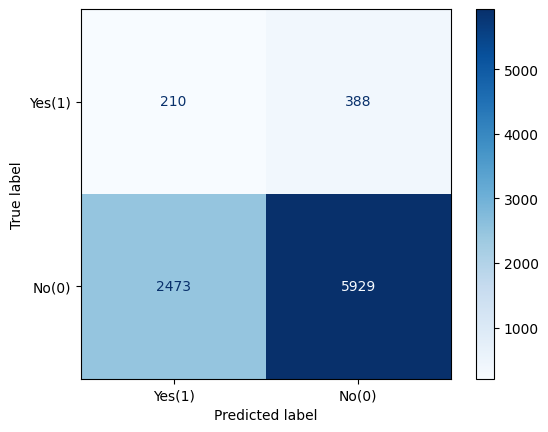

0.5284179431716768


In [229]:
y_final_pred = voting_clf2.predict(x_test_2)
print(classification_report(y_test_2, y_final_pred))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
confusion_mat = confusion_matrix(y_test_2, y_final_pred, labels=[1,0])
disp=ConfusionMatrixDisplay(confusion_matrix=confusion_mat,display_labels = ['Yes(1)','No(0)'])
disp.plot(cmap='Blues')
plt.show()
AUC_ROC = roc_auc_score(y_test_2, y_final_pred)
print(AUC_ROC)